<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
%matplotlib inline

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
dataset = pd.read_csv('pima-indians-diabetes.csv', header = None)
dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [3]:
print('Shape', dataset.shape)
dataset.head(10)

Shape (768, 9)


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [4]:
dataset.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

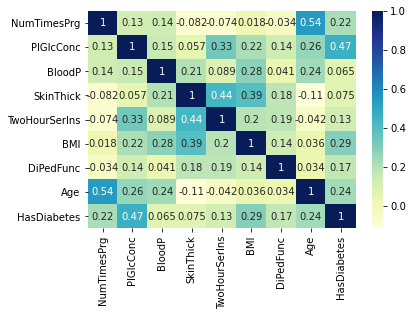

In [5]:
%matplotlib inline
import seaborn
corr_matrix_dataset = seaborn.heatmap(dataset.corr(), cmap = "YlGnBu", annot = True)

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [6]:
sort_corr = dataset.corr().sort_values(by = 'HasDiabetes', ascending = False)
dataset[sort_corr.index[1]]

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

array([[<AxesSubplot:title={'center':'NumTimesPrg'}>,
        <AxesSubplot:title={'center':'PlGlcConc'}>,
        <AxesSubplot:title={'center':'BloodP'}>],
       [<AxesSubplot:title={'center':'SkinThick'}>,
        <AxesSubplot:title={'center':'TwoHourSerIns'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiPedFunc'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'HasDiabetes'}>]], dtype=object)

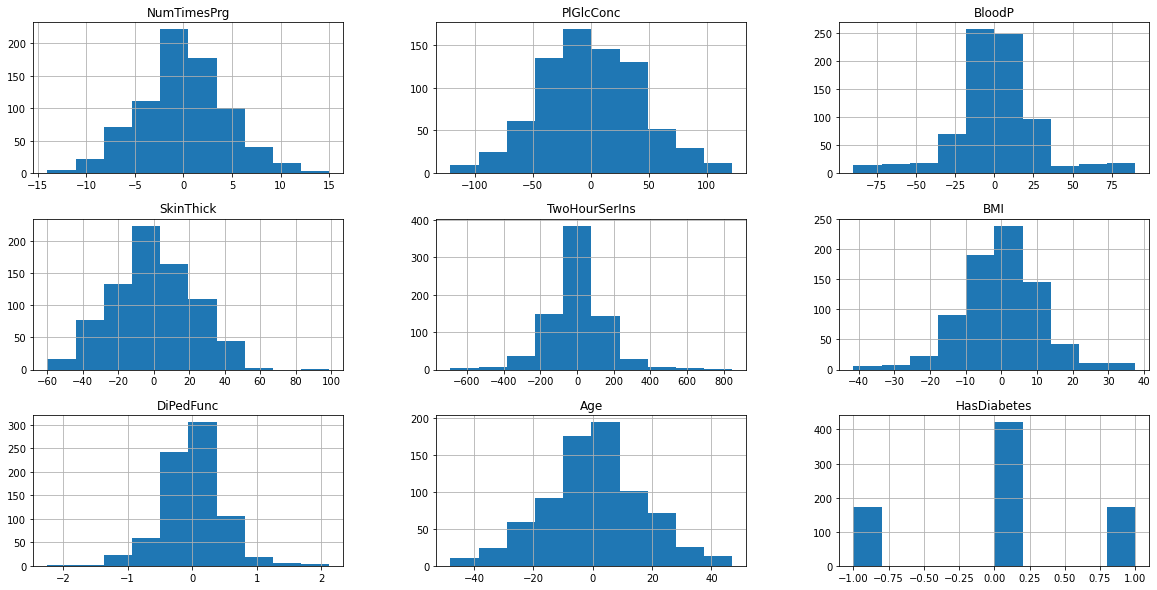

In [7]:
dataset.diff().hist(figsize = (20,10))

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [8]:
dataset['BMI'].replace(0, dataset['BMI'].median(), inplace = True)
dataset['BloodP'].replace(0, dataset['BloodP'].median(), inplace = True)
dataset['PlGlcConc'].replace(0, dataset['PlGlcConc'].median(), inplace = True)
dataset['SkinThick'].replace(0, dataset['SkinThick'].median(), inplace = True)
dataset['TwoHourSerIns'].replace(0, dataset['TwoHourSerIns'].median(), inplace = True)

In [9]:
dataset.head(10)

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [10]:
dataset['Age'] = (dataset['Age'] - dataset['Age'].mean()) / dataset['Age'].std()
dataset['NumTimesPrg'] = (dataset['NumTimesPrg'] - dataset['NumTimesPrg'].mean()) / dataset['NumTimesPrg'].std()

In [11]:
print(dataset['Age'].std())
print(dataset['Age'].mean())
print(dataset['NumTimesPrg'].std())
print(dataset['NumTimesPrg'].mean())

1.0000000000000009
2.198762005800603e-16
1.000000000000002
2.977941967093519e-17


In [12]:
dataset.head(10)

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,0.639530,148,72,35,30.5,33.6,0.627,1.425067,1
1,-0.844335,85,66,29,30.5,26.6,0.351,-0.190548,0
2,1.233077,183,64,23,30.5,23.3,0.672,-0.105515,1
3,-0.844335,89,66,23,94.0,28.1,0.167,-1.040871,0
4,-1.141108,137,40,35,168.0,43.1,2.288,-0.020483,1
5,0.342757,116,74,23,30.5,25.6,0.201,-0.275580,0
6,-0.250789,78,50,32,88.0,31.0,0.248,-0.615709,1
7,1.826623,115,72,23,30.5,35.3,0.134,-0.360612,0
8,-0.547562,197,70,45,543.0,30.5,0.158,1.680164,1
9,1.233077,125,96,23,30.5,32.0,0.232,1.765196,1


# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [13]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1:]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=7)

# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:


### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [14]:
print(dataset['HasDiabetes'].value_counts()[1] / (dataset['HasDiabetes'].value_counts()[1] + dataset['HasDiabetes'].value_counts()[0]))
print(y_trainset['HasDiabetes'].value_counts()[1] / (y_trainset['HasDiabetes'].value_counts()[1] + y_trainset['HasDiabetes'].value_counts()[0]))
print(y_testset['HasDiabetes'].value_counts()[1] / (y_testset['HasDiabetes'].value_counts()[1] + y_testset['HasDiabetes'].value_counts()[0]))

0.3489583333333333
0.34364820846905536
0.37012987012987014


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

In [15]:
X_trainset = np.asarray(X_trainset)
X_testset = np.asarray(X_testset)
y_trainset = y_trainset.values.ravel()
y_testset = y_testset.values.ravel()

In [16]:
print('X Train Set: ',X_trainset.shape)
print('y Train Set: ',y_trainset.shape)
print('X Test Set: ', X_testset.shape)
print('y Test Set: ', y_testset.shape)

X Train Set:  (614, 8)
y Train Set:  (614,)
X Test Set:  (154, 8)
y Test Set:  (154,)


# Import Evaluation Metrices

In [17]:
from sklearn  import metrics

In [18]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
#Create new a KNN model
model_KNN = KNeighborsClassifier()

#Create a dictionary of all values we want to test for parameters
KNN_parameters = {'n_neighbors' : np.arange(1,31), 
                  'weights'     : ['uniform','distance'], 
                  'algorithm'   : ['auto','ball_tree','kd_tree','brute']}

#Use gridsearch to test all values for parameters
KNN_GSCV = GridSearchCV(model_KNN, KNN_parameters, cv = 5)

#Train model
KNN_GSCV.fit(X_trainset, y_trainset)

#Check top performing parameters value
print(KNN_GSCV.best_params_)

#Check mean score for the top performing value of parameters
KNN_GSCV.best_score_

{'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'uniform'}


0.7410369185659069

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

### TO DO:


### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [21]:
#Choose best parameters
k_best = KNN_GSCV.best_params_['n_neighbors']
weights_best = KNN_GSCV.best_params_['weights']
algorithm_best = KNN_GSCV.best_params_['algorithm']
#Train model
model_KNN_best = KNeighborsClassifier(n_neighbors = k_best, weights = weights_best, algorithm = algorithm_best)
model_KNN_best.fit(X_trainset, y_trainset)

from sklearn.metrics import f1_score, accuracy_score
#Calculate the accuracy of the model
#Jaccard_Score
jaccard_scores['train']['KNN']  = accuracy_score  (y_trainset, model_KNN_best.predict(X_trainset))
jaccard_scores['test']['KNN']   = accuracy_score  (y_testset, model_KNN_best.predict(X_testset))

#F1_scores
f1_scores['train']['KNN'] = f1_score(y_trainset, model_KNN_best.predict(X_trainset), average = 'weighted')
f1_scores['test']['KNN']  = f1_score(y_testset, model_KNN_best.predict(X_testset) , average = 'weighted')

In [22]:
print('Jaccard Scores: ' + '\n' + str(jaccard_scores))
print('f1 scores: ' + '\n' + str(f1_scores))

Jaccard Scores: 
{'train': {'KNN': 0.7638436482084691, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7467532467532467, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
f1 scores: 
{'train': {'KNN': 0.7516827364842031, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7327236144137553, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [24]:
#Create new a Decision Tree model
model_DT = DecisionTreeClassifier()

#Create a dictionary of all values we want to test for parameters
DT_parameters = {'criterion'     : ['gini','entropy'], 
                 'max_depth'     : [1,2,3,4,5] , 
                 'max_features'  : ['auto','sqrt','log2']}

#Use gridsearch to test all values for parameters
DT_GSCV = GridSearchCV(model_DT, DT_parameters, cv = 5)

#Train model
DT_GSCV.fit(X_trainset, y_trainset)

#Best Parameters
print(DT_GSCV.best_params_)

#Best Accuracy
print(DT_GSCV.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
0.7393842463014794


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [25]:
#Choose best parameters
c_best = DT_GSCV.best_params_['criterion']
maxf_best = DT_GSCV.best_params_['max_features']
maxd_best = DT_GSCV.best_params_['max_depth']
#Train model
model_DT_best = DecisionTreeClassifier(criterion = c_best, max_features = maxf_best, max_depth = maxd_best)
model_DT_best.fit(X_trainset, y_trainset)

from sklearn.metrics import f1_score, accuracy_score
#Calculate the accuracy of the model
#Jaccard_Score
jaccard_scores['train']['DT']  = accuracy_score(y_trainset, model_DT_best.predict(X_trainset))
jaccard_scores['test']['DT']   = accuracy_score(y_testset, model_DT_best.predict(X_testset))

#F1_scores
f1_scores['train']['DT'] = f1_score(y_trainset, model_DT_best.predict(X_trainset), average = 'weighted')
f1_scores['test']['DT']  = f1_score(y_testset, model_DT_best.predict(X_testset) , average = 'weighted')

In [26]:
print('Jaccard Scores: ' + '\n' + str(jaccard_scores))
print('f1 scores: ' + '\n' + str(f1_scores))

Jaccard Scores: 
{'train': {'KNN': 0.7638436482084691, 'DT': 0.8143322475570033, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7467532467532467, 'DT': 0.7467532467532467, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
f1 scores: 
{'train': {'KNN': 0.7516827364842031, 'DT': 0.8149374029650827, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7327236144137553, 'DT': 0.7480111511525124, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [27]:
from sklearn.svm import SVC

In [28]:
#Create new a SVM model
model_SVM = SVC()

#Create a dictionary of all values we want to test for parameters
SVM_parameters = {'kernel'      : ['linear', 'poly', 'rbf', 'sigmoid'], 
                  'gamma'       : ['scale','auto'],
                  'probability' : [True, False]}

#Use gridsearch to test all values for parameters
SVM_GSCV = GridSearchCV(model_SVM, SVM_parameters)

#Train model
X_trainset_SVM = preprocessing.StandardScaler().fit(X_trainset).transform(X_trainset)
X_testset_SVM = preprocessing.StandardScaler().fit(X_testset).transform(X_testset)
SVM_GSCV.fit(X_trainset_SVM, y_trainset)

#Best Parameters
print(SVM_GSCV.best_params_)

#Best Accuracy
print(SVM_GSCV.best_score_)

{'gamma': 'scale', 'kernel': 'linear', 'probability': True}
0.765480474476876


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [29]:
#Choose best parameters
gamma_best = SVM_GSCV.best_params_['gamma']
kernel_best = SVM_GSCV.best_params_['kernel']
p_best = SVM_GSCV.best_params_['probability']
#Train model
model_SVM_best = SVC(gamma = gamma_best, kernel = kernel_best,probability = p_best)
model_SVM_best.fit(X_trainset_SVM, y_trainset)

from sklearn.metrics import f1_score, accuracy_score
#Calculate the accuracy of the model
#Jaccard_Score
jaccard_scores['train']['SVM']  = accuracy_score(y_trainset, model_SVM_best.predict(X_trainset_SVM))
jaccard_scores['test']['SVM']   = accuracy_score(y_testset, model_SVM_best.predict(X_testset_SVM))

#F1_scores
f1_scores['train']['SVM'] = f1_score(y_trainset, model_SVM_best.predict(X_trainset_SVM), average = 'weighted')
f1_scores['test']['SVM']  = f1_score(y_testset, model_SVM_best.predict(X_testset_SVM) , average = 'weighted')

In [30]:
print('Jaccard Scores: ' + '\n' + str(jaccard_scores))
print('f1 scores: ' + '\n' + str(f1_scores))

Jaccard Scores: 
{'train': {'KNN': 0.7638436482084691, 'DT': 0.8143322475570033, 'SVM': 0.7752442996742671, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7467532467532467, 'DT': 0.7467532467532467, 'SVM': 0.7857142857142857, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
f1 scores: 
{'train': {'KNN': 0.7516827364842031, 'DT': 0.8149374029650827, 'SVM': 0.7662614346653436, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7327236144137553, 'DT': 0.7480111511525124, 'SVM': 0.7719858536062587, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
#Create new a LR model
model_LR = LogisticRegression()

#Create a dictionary of all values we want to test for parameters
LR_parameters = {'solver'        :    ['newton-cg','lbfgs','liblinear','saga'], 
                 'C'             :    np.logspace(-2, 10, 13),    
                 'random_state'  :    [1,2,3,4,5,6,7,8]}

#Use gridsearch to test all values for parameters
LR_GSCV = GridSearchCV(model_LR, LR_parameters, cv = 5)

#Train model
X_trainset_LR = preprocessing.StandardScaler().fit(X_trainset).transform(X_trainset)
X_testset_LR = preprocessing.StandardScaler().fit(X_testset).transform(X_testset)
LR_GSCV.fit(X_trainset_LR, y_trainset)

#Check top performing parameters value
print(LR_GSCV.best_params_)

#Check mean score for the top performing value of parameters
LR_GSCV.best_score_

{'C': 0.1, 'random_state': 1, 'solver': 'newton-cg'}


0.7719845395175262

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [33]:
#Choose best parameters
solver_best = LR_GSCV.best_params_['solver']
C_best = LR_GSCV.best_params_['C']
rs_best = LR_GSCV.best_params_['random_state']
#Train model
model_LR_best = LogisticRegression(solver = solver_best, C = C_best, random_state = rs_best)
model_LR_best.fit(X_trainset_LR, y_trainset)

from sklearn.metrics import f1_score, accuracy_score
#Calculate the accuracy of the model
#Jaccard_Score
jaccard_scores['train']['LR']  = accuracy_score(y_trainset, model_LR_best.predict(X_trainset_LR))
jaccard_scores['test']['LR'] = accuracy_score(y_testset, model_LR_best.predict(X_testset_LR))

#F1_scores
f1_scores['train']['LR'] = f1_score(y_trainset, model_LR_best.predict(X_trainset_LR), average = 'weighted')
f1_scores['test']['LR'] = f1_score(y_testset, model_LR_best.predict(X_testset_LR) , average = 'weighted')

In [34]:
print('Jaccard Scores: ' + '\n' + str(jaccard_scores))
print('f1 scores: ' + '\n' + str(f1_scores))

Jaccard Scores: 
{'train': {'KNN': 0.7638436482084691, 'DT': 0.8143322475570033, 'SVM': 0.7752442996742671, 'LR': 0.7736156351791531, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7467532467532467, 'DT': 0.7467532467532467, 'SVM': 0.7857142857142857, 'LR': 0.7662337662337663, 'EN_HARD': 0, 'EN_SOFT': 0}}
f1 scores: 
{'train': {'KNN': 0.7516827364842031, 'DT': 0.8149374029650827, 'SVM': 0.7662614346653436, 'LR': 0.7638828563113794, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7327236144137553, 'DT': 0.7480111511525124, 'SVM': 0.7719858536062587, 'LR': 0.75605618870925, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
#Create our voting classifier, inputting our models
voting_classifier_soft = VotingClassifier(estimators = [('KNN',model_KNN_best),
                                                        ('DT' ,model_DT_best),
                                                        ('SVM',model_SVM_best),
                                                        ('LR' ,model_LR_best)   ], voting = 'soft')

voting_classifier_soft.fit(X_trainset, y_trainset)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=12)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_features='log2')),
                             ('SVM', SVC(kernel='linear', probability=True)),
                             ('LR',
                              LogisticRegression(C=0.1, random_state=1,
                                                 solver='newton-cg'))],
                 voting='soft')

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [37]:
from sklearn.metrics import f1_score, accuracy_score
#Calculate the accuracy of the model
#Jaccard_Score
jaccard_scores['train']['EN_SOFT']  = accuracy_score(y_trainset, voting_classifier_soft.predict(X_trainset))
jaccard_scores['test']['EN_SOFT'] = accuracy_score(y_testset, voting_classifier_soft.predict(X_testset))

#F1_scores
f1_scores['train']['EN_SOFT'] = f1_score(y_trainset, voting_classifier_soft.predict(X_trainset), average = 'weighted')
f1_scores['test']['EN_SOFT'] = f1_score(y_testset, voting_classifier_soft.predict(X_testset) , average = 'weighted')

In [38]:
print('Jaccard Scores: ' + '\n' + str(jaccard_scores))
print('f1 scores: ' + '\n' + str(f1_scores))

Jaccard Scores: 
{'train': {'KNN': 0.7638436482084691, 'DT': 0.8143322475570033, 'SVM': 0.7752442996742671, 'LR': 0.7736156351791531, 'EN_HARD': 0, 'EN_SOFT': 0.7947882736156352}, 'test': {'KNN': 0.7467532467532467, 'DT': 0.7467532467532467, 'SVM': 0.7857142857142857, 'LR': 0.7662337662337663, 'EN_HARD': 0, 'EN_SOFT': 0.7922077922077922}}
f1 scores: 
{'train': {'KNN': 0.7516827364842031, 'DT': 0.8149374029650827, 'SVM': 0.7662614346653436, 'LR': 0.7638828563113794, 'EN_HARD': 0, 'EN_SOFT': 0.7869904961019091}, 'test': {'KNN': 0.7327236144137553, 'DT': 0.7480111511525124, 'SVM': 0.7719858536062587, 'LR': 0.75605618870925, 'EN_HARD': 0, 'EN_SOFT': 0.781548640039206}}


### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [39]:
#create our voting classifier, inputting our models
voting_classifier_hard = VotingClassifier(estimators = [('KNN',model_KNN_best),
                                                        ('DT' ,model_DT_best),
                                                        ('SVM',model_SVM_best),
                                                        ('LR' ,model_LR_best)   ], voting = 'hard')

voting_classifier_hard.fit(X_trainset, y_trainset)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=12)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_features='log2')),
                             ('SVM', SVC(kernel='linear', probability=True)),
                             ('LR',
                              LogisticRegression(C=0.1, random_state=1,
                                                 solver='newton-cg'))])

In [40]:
from sklearn.metrics import f1_score, accuracy_score
#Calculate the accuracy of the model
#Jaccard_Score
jaccard_scores['train']['EN_HARD']  = accuracy_score(y_trainset, voting_classifier_hard.predict(X_trainset))
jaccard_scores['test']['EN_HARD'] = accuracy_score(y_testset, voting_classifier_hard.predict(X_testset))

#F1_scores
f1_scores['train']['EN_HARD'] = f1_score(y_trainset, voting_classifier_hard.predict(X_trainset), average = 'weighted')
f1_scores['test']['EN_HARD'] = f1_score(y_testset, voting_classifier_hard.predict(X_testset) , average = 'weighted')

In [41]:
print('Jaccard Scores: ' + '\n' + str(jaccard_scores))
print('f1 scores: ' + '\n' + str(f1_scores))

Jaccard Scores: 
{'train': {'KNN': 0.7638436482084691, 'DT': 0.8143322475570033, 'SVM': 0.7752442996742671, 'LR': 0.7736156351791531, 'EN_HARD': 0.7866449511400652, 'EN_SOFT': 0.7947882736156352}, 'test': {'KNN': 0.7467532467532467, 'DT': 0.7467532467532467, 'SVM': 0.7857142857142857, 'LR': 0.7662337662337663, 'EN_HARD': 0.7597402597402597, 'EN_SOFT': 0.7922077922077922}}
f1 scores: 
{'train': {'KNN': 0.7516827364842031, 'DT': 0.8149374029650827, 'SVM': 0.7662614346653436, 'LR': 0.7638828563113794, 'EN_HARD': 0.7746986104890271, 'EN_SOFT': 0.7869904961019091}, 'test': {'KNN': 0.7327236144137553, 'DT': 0.7480111511525124, 'SVM': 0.7719858536062587, 'LR': 0.75605618870925, 'EN_HARD': 0.7464300957258703, 'EN_SOFT': 0.781548640039206}}


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [42]:
df1 = pd.DataFrame.from_dict(jaccard_scores)
df1 = df1.rename(columns = {'train': 'Jaccard-training', 'test': 'Jaccard-testing'})

df2 = pd.DataFrame.from_dict(f1_scores)
df2 = df2.rename(columns = {'train': 'F1-score-training', 'test': 'F1-score-testing'})

df = pd.concat([df1,df2], axis = 1)
df.index = ['KNN','Decision Tree', 'SVM', 'Logistic Regression','Hard Voting', 'Soft Voting']
df.reset_index(inplace = True)
df = df.rename(columns = {'index': 'Algorithm'})

v = df[list(df.columns)[2]]
df = df.drop(['Jaccard-testing'], axis = 1)
df.insert(3,'Jaccard-testing',v)

df

,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,0.763844,0.751683,0.746753,0.732724
1,Decision Tree,0.814332,0.814937,0.746753,0.748011
2,SVM,0.775244,0.766261,0.785714,0.771986
3,Logistic Regression,0.773616,0.763883,0.766234,0.756056
4,Hard Voting,0.786645,0.774699,0.759740,0.746430
5,Soft Voting,0.794788,0.786990,0.792208,0.781549


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:
